# Problem Statement

1.	An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

---------------- #### ---------------

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [78]:
data = pd.read_csv("50_Startups.csv")
data.shape

(50, 5)

We have 50 rows and 5 columns, lets explore our dataset

In [79]:
data.head()

,Research,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [80]:
data.tail()

,Research,Administration,Marketing,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


We will check for any missing value in the data

<AxesSubplot:>

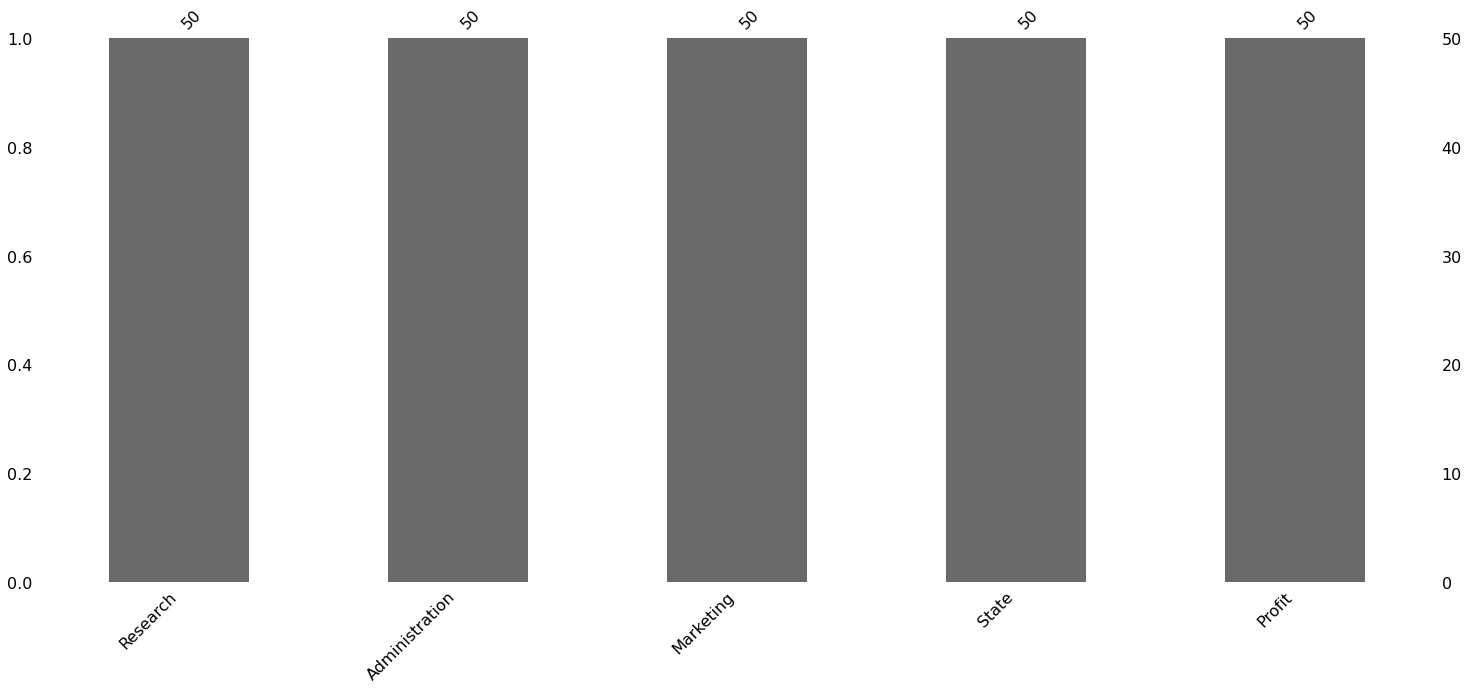

In [81]:
msno.bar(data)

In [82]:
data.dtypes

Research          float64
Administration    float64
Marketing         float64
State              object
Profit            float64
dtype: object

Since we spaces in our colnames, we will replace these spaces with underscore

In [83]:
#data.columns = data.columns.str.replace(' ', '')

We do not have missing values, however, we do have some values which are 0, we will transform this data

In [84]:
data.describe()

,Research,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

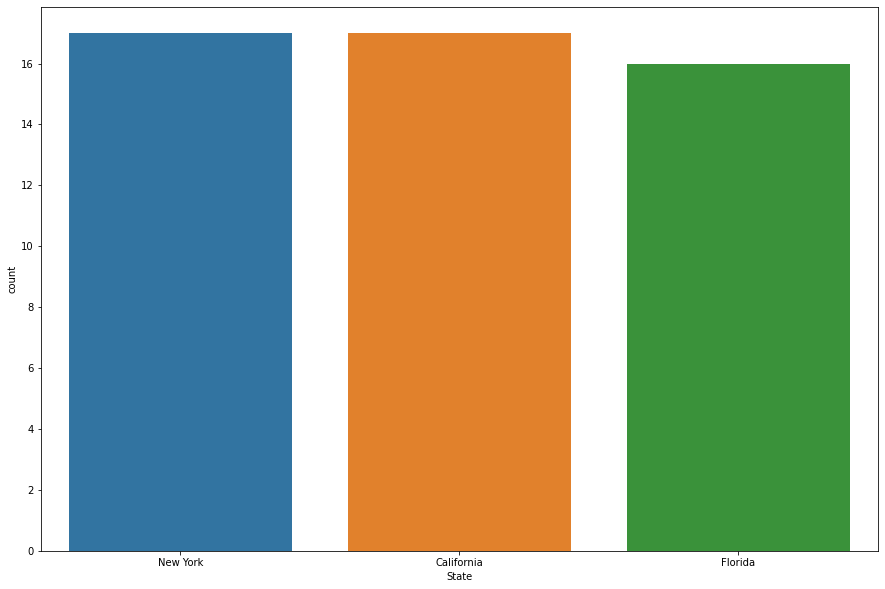

In [85]:
sns.countplot(data['State'])

Lets Visualize our dataset

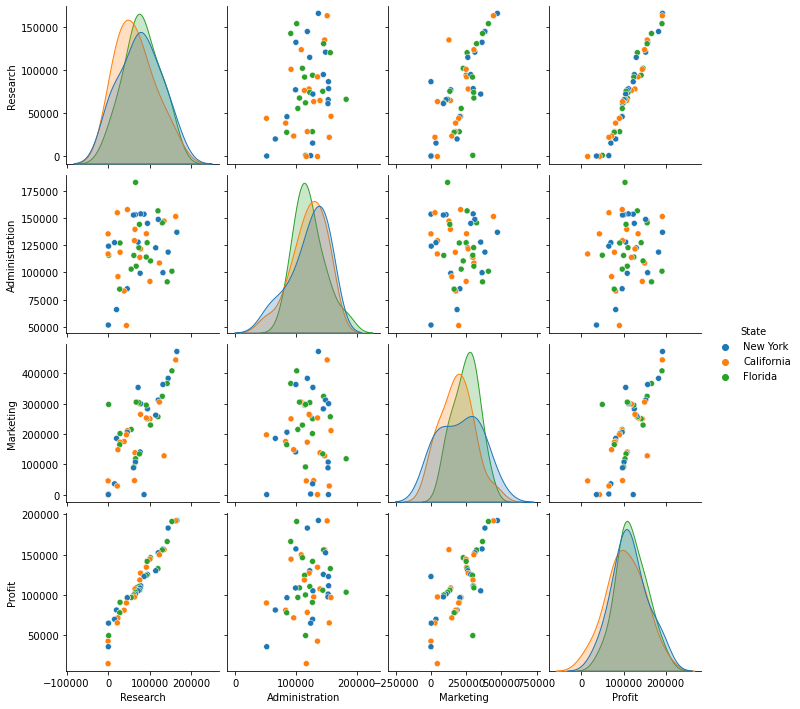

In [86]:
sns.pairplot(data, hue='State')

<AxesSubplot:>

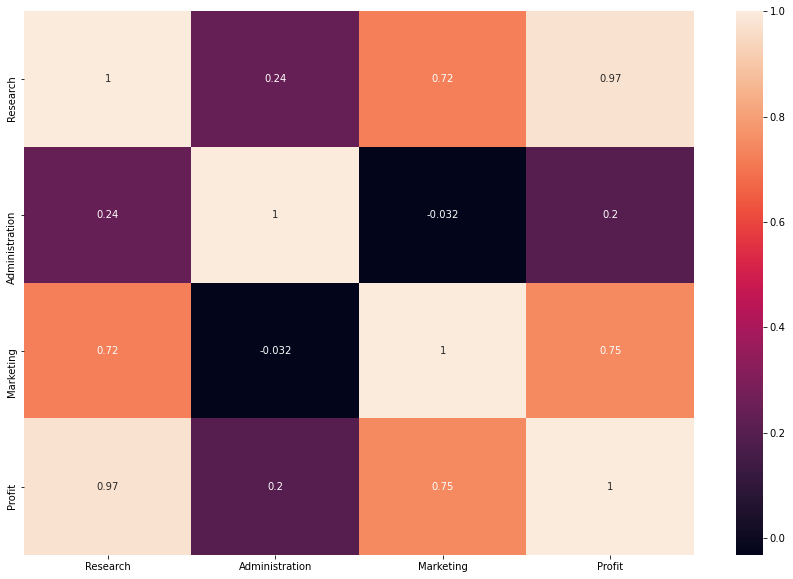

In [87]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(), annot=True)

There is a very high correlation between Profit and R&D Spend.

There is a high correlation between Marketing and Profit

There is a weak correlation between Administration and Profit

## Lets check if our values are following normal distribution or not

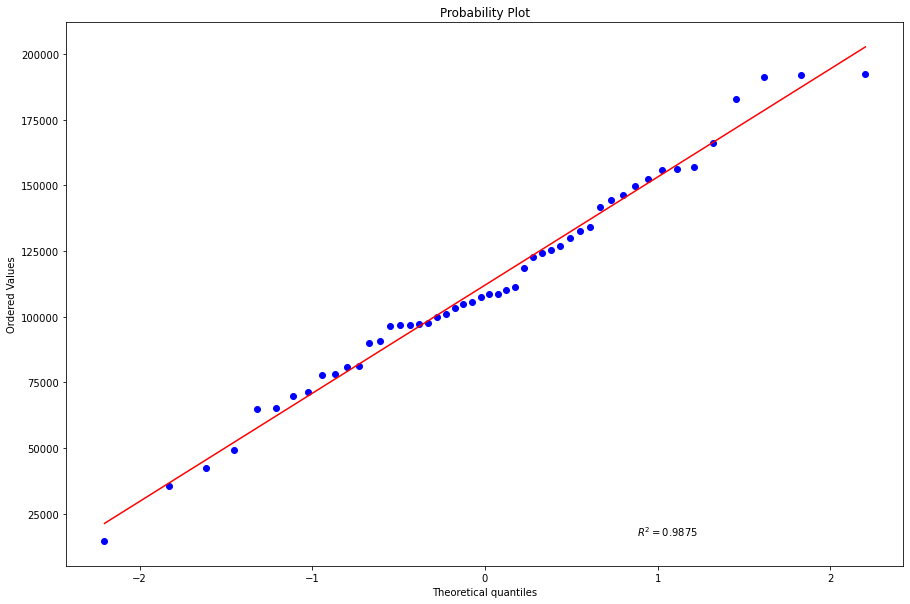

In [88]:
from scipy import stats
import pylab
stats.probplot(data.Profit, dist='norm', rvalue=True, plot=pylab)
plt.show()

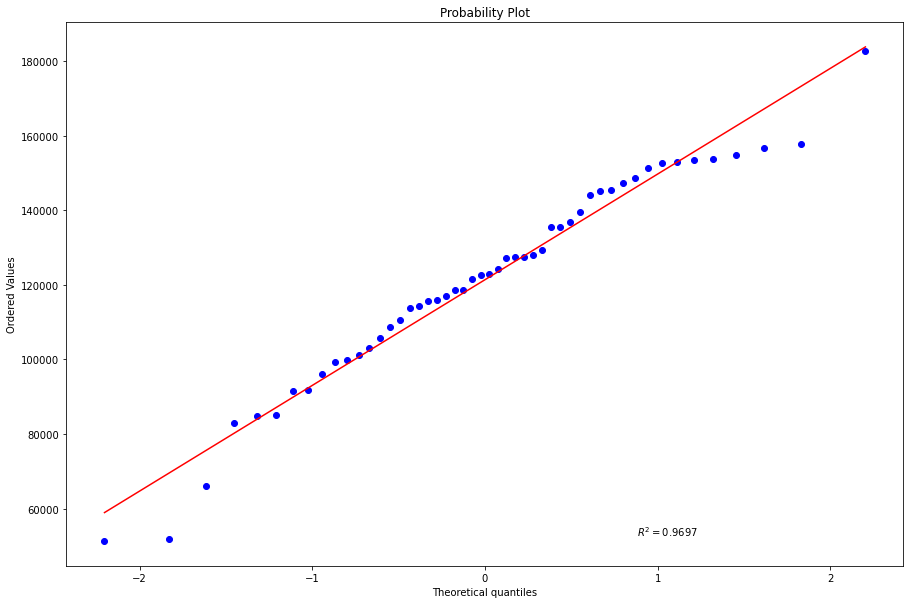

In [89]:
stats.probplot(data.Administration, dist='norm',rvalue=True, plot=pylab)
plt.show()

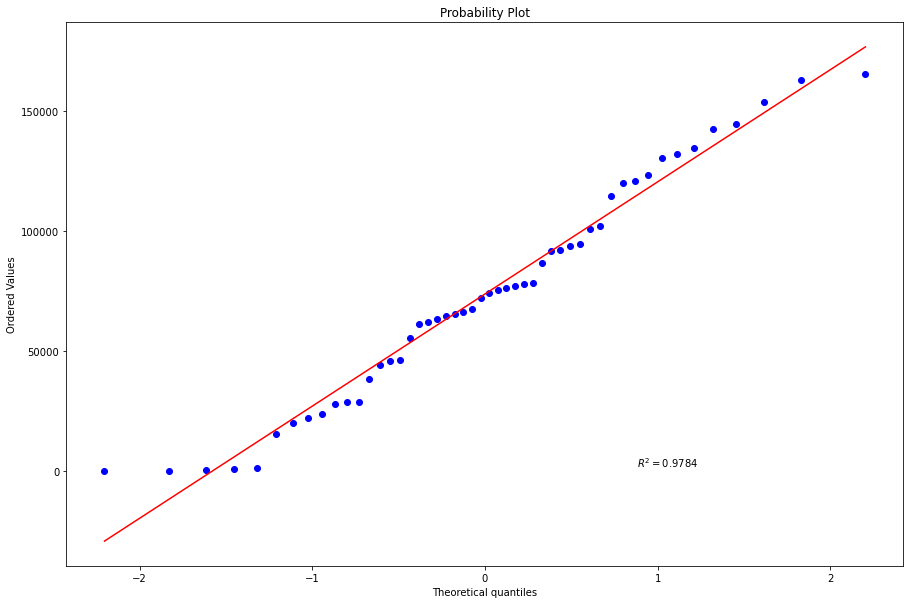

In [90]:
stats.probplot(data['Research'],dist="norm", rvalue=True,plot=pylab)
plt.show()

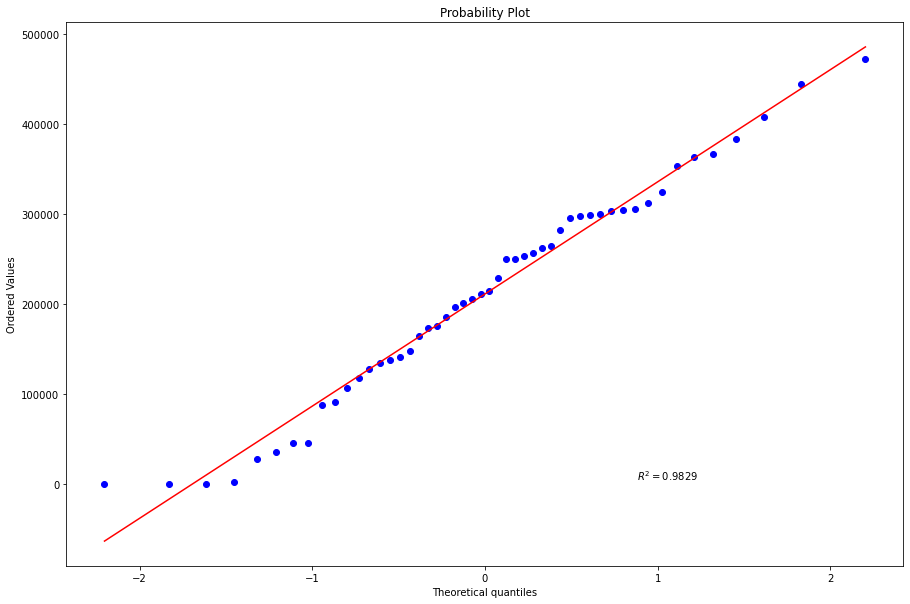

In [91]:
stats.probplot(data['Marketing'], dist='norm', rvalue=True, plot=pylab)
plt.show()

Looks like most of the variables are following normal distribrution

Lets check for outliers in our dataset

<AxesSubplot:>

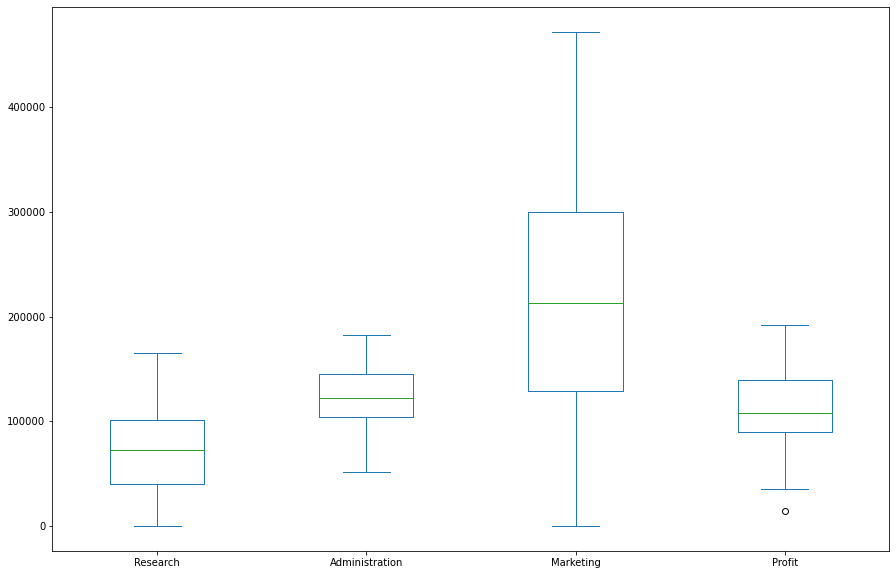

In [92]:
data[['Research', 'Administration', 'Marketing', 'Profit']].plot(kind='box')

Seems there is atleast one outlier in the data which belongs to profit column

Lets see how many outliers are there in our dataset

In [93]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

outliers = (data < (Q1-1.5* IQR)) | (data > (Q3+1.5* IQR))
outliers.sum()

<ipython-input-93-7f200376dff5>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < (Q1-1.5* IQR)) | (data > (Q3+1.5* IQR))


Administration    0
Marketing         0
Profit            1
Research          0
State             0
dtype: int64

Our assumption was correct, we have one outlier value in Profit Column, we will transform the data in later stages

Lets check for Collinearity problem

In [94]:
import statsmodels.formula.api as smf

In [95]:
ml1 = smf.ols('Profit ~ Administration + Research + Marketing', data = data).fit()

In [96]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           4.53e-30
Time:                        14:56:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Research           0.8057      0.045     17.846      0.000       0.715       0.897
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""